<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part Two: Feature Selection </h2>	


<h4> In this section, we would like you to select between 15 and 20 features to focus your model on. This will require significant explatoratory research. The first one is already implemented for you, and the next two are pre-specified.  </h4>

In [9]:
import pandas as pd
import numpy as np
import skimage.io as io
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt
starting_data = pd.read_pickle("./starting_data_part1.pkl")

In [5]:
def normalize(image):
    """
    Given an image (numpy ndarray) check if it has just one color channel (black/white)
    If yes, return the same channel intesities copied in all three RGB color channels.
    """
    if len(image.shape) == 2:
        temp = np.zeros((image.shape[0], image.shape[1], 3))
        for i in range(3):
            temp[:,:,i] = image
        image = temp
    return image


def red_avg(image):
    """
    Returns the average intesity of the red-channel for the given image (numpy ndarray)
    """
    return np.mean(image[:, :, 0])


def green_avg(image):
    """
    Returns the average intesity of the green-channel for the given image (numpy ndarray)
    """
    return np.mean(image[:, :, 1])


def blue_avg(image):
    """
    Returns the average intesity of the blue-channel for the given image (numpy ndarray)
    """
    return np.mean(image[:, :, 2])

def argmax(image):
    """
    Given image (numpy ndarray) return the fraction times when that channel has maximum
    intensity in the image
    """
    orig = np.zeros(3)
    a = np.argmax(image, axis = 2)
    vals, counts = np.unique(a, return_counts=True)
    for i in range(3):
        if i in vals:
            orig[i] = counts[np.where(vals == i)]
    percent_max = orig/np.sum(orig)
    
    # handling special case when length not equal to 3
    if len(percent_max) != 3:
        print('Warning! Percent max length is not 3')
        
    return percent_max

def crop(image):
    """
    Given an image (numpy ndarray), return a central patch of the image such that length and bredth of 
    the patch is half the previous one
    """
    m, n, k = image.shape
    patch_min = int(m/4)
    patch_max = int(3*m/4)
    cropped = image[patch_min:patch_max, patch_min:patch_max, :]
    
    return cropped


def contrast(image):
    """
    Given an image (numpy ndarray), return the contrast of the image
    """
    
    vals = np.zeros(3)
    for i in range(3):
        vals[i] = (np.max(image[:, :, i]) - np.min(image[:, :, i]))
    
    return np.mean(vals)

def edges(image, threshold_low = 100, threshold_high = 200):
    """
    Given an image (numpy ndarray), return the fraction of number of pixels that are
    part of an 'edge' according to canny edge detection algorithm.
    """
    # converting from float to uint8 to keep cv2 happy!!
    edges_image = cv.Canny(image.astype(np.uint8), threshold_low, threshold_high)
    
    vals, counts = np.unique(edges_image, return_counts=True)
    
    if len(counts)<2:
        return 1.0
    else:
        return counts[1]/sum(counts)

,class,filename,aspect,red,green,blue,argmax_r,argmax_g,argmax_b,contrast,edge,red_crop,green_crop,blue_crop,argmax__crop_r,argmax_crop_g,argmax_crop_b,contrast_crop,edge_crop
0,0,airplanes_0001.jpg,2.426829,183.357049,176.758482,149.242033,0.572327,0.421021,0.006653,254.463664,0.113464,161.131365,160.474151,137.006400,0.536377,0.460449,0.003174,250.598267,0.193604
1,0,airplanes_0002.jpg,2.179348,210.781639,189.322828,164.848389,0.971802,0.028198,0.000000,249.801636,0.056641,172.329463,127.098600,104.797017,0.984375,0.015625,0.000000,239.890218,0.149658
2,0,airplanes_0003.jpg,2.381818,169.915943,147.578112,111.457837,0.705322,0.056702,0.237976,253.397135,0.126892,155.995922,106.718251,49.301164,0.809326,0.065430,0.125244,220.446019,0.228027
3,0,airplanes_0004.jpg,2.311765,152.404667,132.895747,78.073232,0.835449,0.161743,0.002808,253.534108,0.159851,146.875142,103.978308,37.956971,0.943848,0.052734,0.003418,247.106567,0.236084
4,0,airplanes_0005.jpg,2.244318,147.112763,150.219843,86.000939,0.404968,0.515442,0.079590,254.519206,0.169128,100.401541,102.504867,46.679292,0.262695,0.493408,0.243896,253.630859,0.244629


In [6]:
# Checking the min-max and counts of generated data to ensure no obvious outliers
train_df.describe()

,class,aspect,red,green,blue,argmax_r,argmax_g,argmax_b,contrast,edge,red_crop,green_crop,blue_crop,argmax__crop_r,argmax_crop_g,argmax_crop_b,contrast_crop,edge_crop
count,1501.00000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,9.57495,1.271221,118.674594,117.969340,109.286776,0.499332,0.232381,0.268287,241.695293,0.177471,116.009166,110.528402,101.724997,0.549550,0.186178,0.264272,229.225584,0.206349
std,5.54189,0.427860,44.630329,40.436065,45.336776,0.312321,0.242714,0.301192,20.051401,0.081838,41.266951,36.541116,41.342812,0.329501,0.219490,0.310755,28.169096,0.087418
min,0.00000,0.525397,1.106049,0.560478,3.824446,0.000000,0.000000,0.000000,50.916667,0.002747,1.067322,0.806227,6.372816,0.000000,0.000000,0.000000,42.500000,0.002686
25%,5.00000,0.918333,88.656294,92.409164,74.885923,0.230652,0.030273,0.018738,237.276774,0.118164,89.898811,87.577558,70.761315,0.261719,0.016602,0.010010,218.103882,0.147461
50%,9.00000,1.333333,117.803005,117.420675,105.316196,0.498779,0.146118,0.138184,249.582682,0.171936,117.124451,108.332845,95.893485,0.585449,0.092529,0.120117,237.810791,0.210449
75%,14.00000,1.500000,146.935043,142.000479,139.460025,0.763428,0.362305,0.427551,254.113444,0.240234,142.853776,132.894375,127.482779,0.852539,0.287598,0.445557,249.866933,0.268311
max,19.00000,3.469027,243.682848,242.976391,241.722951,1.000000,0.986145,1.000000,255.000000,0.375793,237.698004,235.436205,241.186424,1.000000,0.992920,1.000000,255.000000,1.000000


In [49]:
# #  scratch work.... del anytime
# def edges(image, threshold_low = 100, threshold_high = 200):
#     image = io.imread(image)
#     display(len(np.unique(image)))
#     # m,n,k = image.shape
#     edges_image = cv.Canny(image.astype(np.uint8), threshold_low, threshold_high)
#     vals, counts = np.unique(edges_image, return_counts=True)
#     # display(vals, counts)
#     return counts[1]/sum(counts)

# edges_bear = edges(r"data/20_categories_training/airplanes/airplanes_0055.jpg")
# print(edges_bear)

256

0.14155056139788963


Define more features above, performing any EDA research below. We expect all external sources sited, and a couple significant different graphs indicating some form of EDA. 

<h4> Graphs </h4>

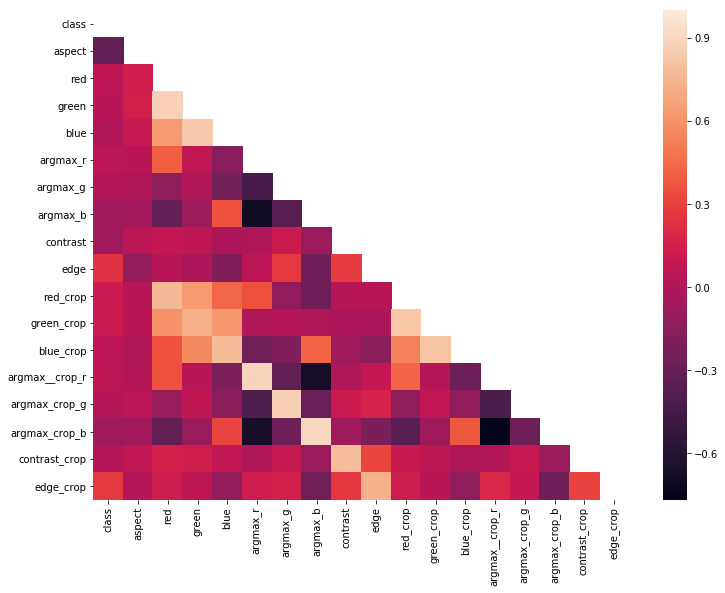

In [16]:
corr = train_df.corr()
plt.figure(figsize=(12,9))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask)

<h4> Sources </h4>

In [20]:
# B/W images with single channel.. keep to show for report
files=[]
for i,image in enumerate(starting_data["image"]):
    if len(image.shape) < 3:
        files.append(starting_data.loc[i, "filename"])
print(files)

['blimp_0022.jpg', 'comet_0006.jpg', 'comet_0011.jpg', 'comet_0013.jpg', 'comet_0021.jpg', 'comet_0036.jpg', 'comet_0038.jpg', 'comet_0041.jpg', 'comet_0049.jpg', 'comet_0052.jpg', 'comet_0053.jpg', 'comet_0057.jpg', 'comet_0058.jpg', 'crab_0045.jpg', 'dolphin_0025.jpg', 'gorilla_0128.jpg']


<h4> DataFrame Creation </h4>

In [6]:
def feature_frame(df, image_field="image"):
    """
    Given a DataFrame and the field corresponding to images (numpy ndarray)
    return a dataframe with all the required features added to the dataframe as series
    
    """
    df[image_field] = df[image_field].apply(normalize)

    df["red"] = df[image_field].apply(red_avg)
    df["green"] = df[image_field].apply(green_avg)
    df["blue"] = df[image_field].apply(blue_avg)
    df["argmax"] = df[image_field].apply(argmax)
    df[["argmax_r","argmax_g","argmax_b"]] = pd.DataFrame(df.argmax.values.tolist(), index= df.index)
    df["contrast"] = df[image_field].apply(contrast)
    df["edge"] = df[image_field].apply(edges)

    
    df["cropped"] = df[image_field].apply(crop)
    df["red_crop"] = df["cropped"].apply(red_avg)
    df["green_crop"] = df["cropped"].apply(green_avg)
    df["blue_crop"] = df["cropped"].apply(blue_avg)
    df["argmax_crop"] = df["cropped"].apply(argmax)
    df[["argmax__crop_r","argmax_crop_g","argmax_crop_b"]] = pd.DataFrame(df.argmax_crop.values.tolist(), index= df.index)
    df["contrast_crop"] = df["cropped"].apply(contrast)
    df["edge_crop"] = df["cropped"].apply(edges)


    # remove filename from the training df later... kept temporarily for easy debugging
    df = df.drop(labels = [image_field,  'cropped','argmax', 'argmax_crop'], axis = 1) #'filename',

    return df

train_df = feature_frame(starting_data, image_field="image")
train_df.head()


In [21]:
# Save the feature dataframe to a pickle compressed object to use in notebook 3
train_df.to_pickle("train_df_part2.pkl")